In [24]:
import pandas as pd
import numpy as np
import sys

sys.path.append('./modules')
from data import PageData
from visual import *


In [15]:
# First load the basic_data 
data = pd.read_csv('./../databases/csv-data/basic_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20986 entries, 0 to 20985
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   uid             20986 non-null  object 
 1   date            20986 non-null  object 
 2   hasGoal         20986 non-null  bool   
 3   hasRevenue      20986 non-null  bool   
 4   duration        20986 non-null  object 
 5   deviceCategory  20986 non-null  object 
 6   channel         20986 non-null  object 
 7   event           19657 non-null  float64
 8   pageview        20986 non-null  int64  
 9   page            20986 non-null  object 
 10  action          20986 non-null  object 
dtypes: bool(2), float64(1), int64(1), object(7)
memory usage: 1.5+ MB


Figure saved, piechart-channel


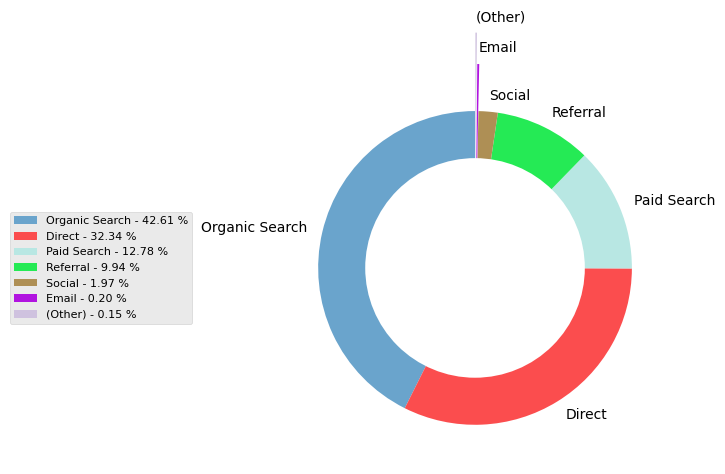

In [16]:
var = 'channel'
plot_piechart(var, data, explode=(0,0,0,0,0,0.3,0.5))
save_fig(f'piechart-{var}')

In [17]:
# Remove extreme pageview values
pageview = [x for x in data['pageview'].map(int).values if x<=50]
data['event'].replace({np.nan: '0'}, inplace=True)
# Remove extreme event values
event = [x for x in data['event'].map(int).values if x<=30]

C:\Users\Lostcz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Figure saved, displot-pageview_per_session


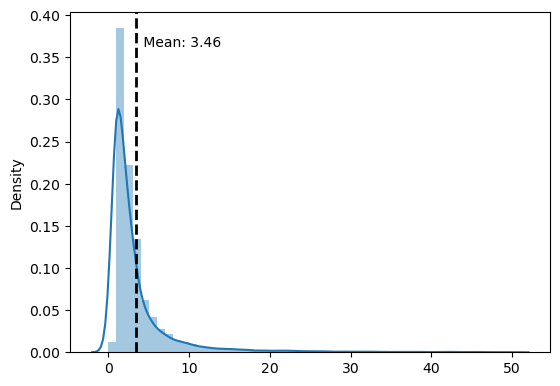

In [18]:
var = pageview; label = "pageview_per_session" 
plot_distribution(var)
save_fig(f'displot-{label}')

C:\Users\Lostcz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Figure saved, distribution-event_per_session


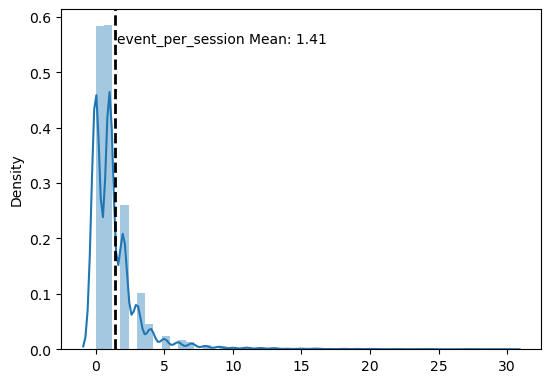

In [19]:
var = event; label = "event_per_session"
plot_distribution(var, label=label)
save_fig(f'distribution-{label}')

In [20]:
# Import the cleaned page_df
page_df = PageData(data).cleaned
page_df.head()

,index,uid,page
0,0,000708d176f8010cb95adfa271ad797d,Being taken to small claims court
1,1,000708d176f8010cb95adfa271ad797d,Taking someone to small claims court
2,2,001291be71d38604bc02f7c469b80704,Why does she bleed when I finger her?
3,3,001291be71d38604bc02f7c469b80704,Fingering a girl
4,4,00310de616cf03e7740b739ead30aed2,Thank you


Figure saved, page_frequency


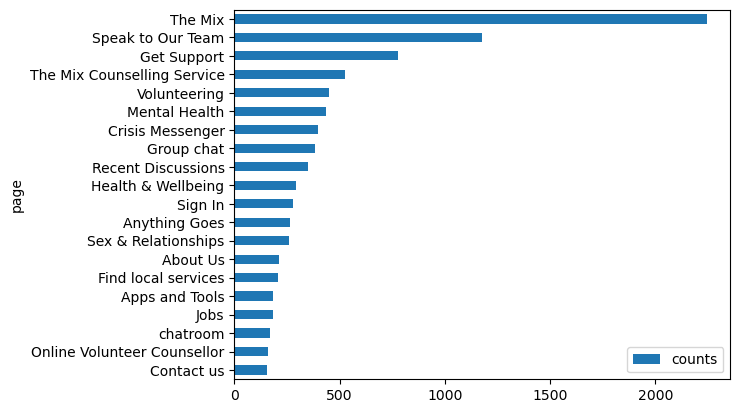

In [21]:
plot_page_counts(page_df, 20)
save_fig('page_frequency')

Figure saved, related_page-The Mix


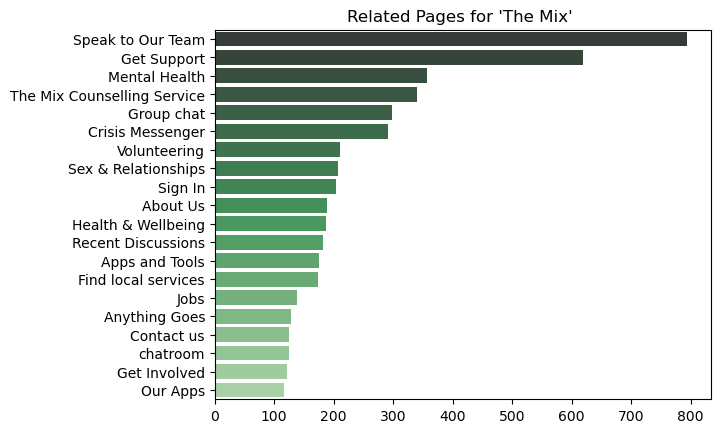

In [22]:
combinations_df = PageData(data).get_page_combinations()

var = 'The Mix'
plot_related_pages(combinations_df, var)
save_fig(f'related_page-{var}')

Figure saved, related_page-Anything Goes


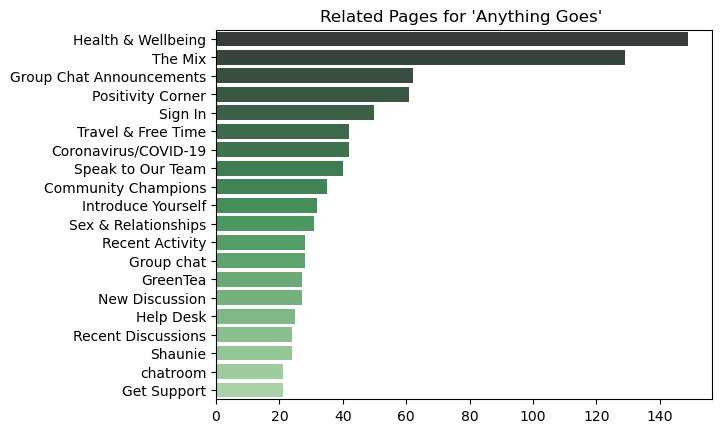

In [23]:
var = 'Anything Goes'
plot_related_pages(combinations_df, var)
save_fig(f'related_page-{var}')